In [1]:
import pandas as pd
import numpy as np                                               #gerekli kütüphanelerin import edilmesi.
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D,MaxPool2D,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
df=pd.read_csv("dna2.csv")                           #datasetin okunması.

In [3]:
df.info()                                            #datasetin bilgilerinin görüntülenmesi.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Columns: 181 entries, A0 to class
dtypes: int64(181)
memory usage: 1.0 MB


In [4]:
df.head()                                #datasetin ilk 5 satırı görüntülendi.

A0  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  A171  A172  A173  A174  A175  \
0   0   1   0   0   0   0   1   0   0   0  ...     1     0     0     0     0   
1   0   0   1   0   0   1   0   0   0   0  ...     0     0     0     1     0   
2   0   0   1   0   0   1   0   1   0   0  ...     0     1     0     0     0   
3   0   0   0   0   0   0   0   1   0   0  ...     0     0     1     0     0   
4   0   1   0   0   0   0   0   1   0   0  ...     0     1     0     0     1   

   A176  A177  A178  A179  class  
0     1     1     0     0      3  
1     0     0     1     0      3  
2     1     0     0     1      3  
3     1     0     0     1      1  
4     0     1     0     0      2  

[5 rows x 181 columns]

In [5]:
df.isnull().sum()                                #boş verilerin sayısı görüntülendi.

A0       0
A1       0
A2       0
A3       0
A4       0
        ..
A176     0
A177     0
A178     0
A179     0
class    0
Length: 181, dtype: int64

In [6]:
y = df["class"]
X = df.drop(['class'], axis=1)                #x ve y değerlerine atama işlemi yapıldı.

In [7]:
n_classes = y.unique()
n_classes
                                                       #cok outputlu dataset için gerekli veriler girildi.
from keras import utils as np_utils
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
                                                         #y değerleri bastırılıp, boyutu görüntülendi.

y = np_utils.to_categorical(y)
print(y)

y.shape

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


(749, 3)

In [8]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()                                   #standart scaler makeineye eğitildi.
X=Scaler.fit_transform(X)                                   

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)  

In [10]:
 def keras_model(optimizer="adam"):
    model = Sequential()
    model.add(Dense(7, input_dim=180, activation='relu'))
    model.add(Dropout(0.3))                                  # overfittingin önüne geçmek için droupout eklendi
    model.add(Dense(41, activation='relu'))                         #Keras ağı oluşturuldu.
    model.add(Dropout(0.4))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax')) 
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy"])
    return model
model = keras_model() 

In [11]:
 egitim=model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,validation_data=(X_test,y_test))

Epoch 1/100
17/17 [==============================] - 3s 182ms/step - loss: 0.6504 - accuracy: 0.2958 - val_loss: 0.6468 - val_accuracy: 0.1911
Epoch 2/100
17/17 [==============================] - 1s 52ms/step - loss: 0.6389 - accuracy: 0.3397 - val_loss: 0.6311 - val_accuracy: 0.2978
Epoch 3/100
17/17 [==============================] - 1s 53ms/step - loss: 0.6352 - accuracy: 0.3740 - val_loss: 0.6165 - val_accuracy: 0.4667
Epoch 4/100
17/17 [==============================] - 1s 64ms/step - loss: 0.6184 - accuracy: 0.4504 - val_loss: 0.6041 - val_accuracy: 0.5422
Epoch 5/100
17/17 [==============================] - 1s 59ms/step - loss: 0.6107 - accuracy: 0.4714 - val_loss: 0.5900 - val_accuracy: 0.5733
Epoch 6/100
17/17 [==============================] - 1s 63ms/step - loss: 0.5914 - accuracy: 0.4981 - val_loss: 0.5748 - val_accuracy: 0.5733
Epoch 7/100
17/17 [==============================] - 1s 62ms/step - loss: 0.5871 - accuracy: 0.5401 - val_loss: 0.5583 - val_accuracy: 0.5822
Epoch

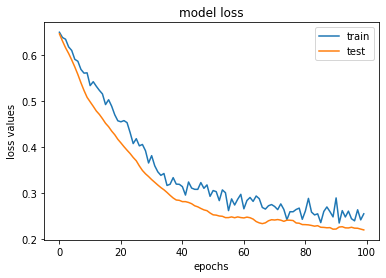

In [12]:
import matplotlib.pyplot as plt
plt.plot(egitim.history['loss'], label='train')
plt.plot(egitim.history['val_loss'], label='test')
plt.title('model loss')                                           #grafik çizdirildi.
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

In [13]:
import sklearn.metrics as metrics
y_pred=model.predict_classes(X_test)       #metrics import edildi.

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [14]:
print("Accuracy:",metrics.accuracy_score(np.argmax(y_test, axis=1),y_pred))       #accuracy hesaplandı.

Accuracy: 0.9111111111111111


In [15]:
print("f1_weighted:",metrics.f1_score(np.argmax(y_test, axis=1), y_pred,average='weighted'))      #f1 hesaplandı.

f1_weighted: 0.9112301223713782


In [16]:
param_grid = {
   
    'epochs': [100,150,200], 
    'batch_size':[50,100],
    'optimizer':['RMSprop', 'Adam','SGD'],                           #grid search değerleri girildi.
    
}


In [17]:
model = KerasClassifier(build_fn= keras_model, verbose=1)


grid = GridSearchCV(estimator=model,                  #keras için grid search verileri belirlendi.
                    n_jobs=-1, 
                    verbose=1,
                    cv=5,
                    param_grid=param_grid)

In [18]:
grid_cv_model = grid.fit(X_train, y_train,)                     #grid search fit edildi.

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 17.2min finished


Epoch 1/150
11/11 [==============================] - 0s 9ms/step - loss: 0.6563 - accuracy: 0.2672
Epoch 2/150
11/11 [==============================] - 0s 3ms/step - loss: 0.6444 - accuracy: 0.3015
Epoch 3/150
11/11 [==============================] - 0s 10ms/step - loss: 0.6370 - accuracy: 0.3569
Epoch 4/150
11/11 [==============================] - 0s 3ms/step - loss: 0.6293 - accuracy: 0.3760
Epoch 5/150
11/11 [==============================] - 0s 3ms/step - loss: 0.6143 - accuracy: 0.4790
Epoch 6/150
11/11 [==============================] - 0s 13ms/step - loss: 0.6145 - accuracy: 0.4981
Epoch 7/150
11/11 [==============================] - 0s 3ms/step - loss: 0.6076 - accuracy: 0.5038
Epoch 8/150
11/11 [==============================] - 0s 3ms/step - loss: 0.6061 - accuracy: 0.5286
Epoch 9/150
11/11 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.5324
Epoch 10/150
11/11 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.5267
Epoch 1

In [19]:
print(grid_cv_model.best_params_)            #grid search best params görüntülendi.

{'batch_size': 50, 'epochs': 150, 'optimizer': 'Adam'}


In [24]:
kfold = KFold(n_splits=5, shuffle=True)                        #kfold için accuracy hesaplandı.
results = cross_val_score(grid_cv_model, X_test, np.argmax(y_test, axis=1), cv=kfold,scoring= 'accuracy')

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 13.4min finished


Epoch 1/150
4/4 [==============================] - 0s 6ms/step - loss: 1.3965 - accuracy: 0.2722
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 1.3918 - accuracy: 0.3556
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 1.3916 - accuracy: 0.2944
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 1.3900 - accuracy: 0.3000
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 1.3902 - accuracy: 0.3444
Epoch 6/150
4/4 [==============================] - 0s 22ms/step - loss: 1.3885 - accuracy: 0.3278
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3890 - accuracy: 0.3611
Epoch 8/150
4/4 [==============================] - 0s 3ms/step - loss: 1.3880 - accuracy: 0.3500
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3877 - accuracy: 0.3111
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3873 - accuracy: 0.3056
Epoch 11/150
4/4 [==========

[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  9.9min finished


Epoch 1/100
4/4 [==============================] - 0s 8ms/step - loss: 1.4037 - accuracy: 0.2167
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.3911 - accuracy: 0.3056
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.3901 - accuracy: 0.2944
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.3892 - accuracy: 0.3000
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.3856 - accuracy: 0.3444
Epoch 6/100
4/4 [==============================] - 0s 23ms/step - loss: 1.3807 - accuracy: 0.3278
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 1.3810 - accuracy: 0.3500
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 1.3790 - accuracy: 0.3056
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 1.3805 - accuracy: 0.3667
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.3783 - accuracy: 0.3278
Epoch 11/100
4/4 [==========

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  8.1min finished


Epoch 1/150
4/4 [==============================] - 0s 18ms/step - loss: 1.3851 - accuracy: 0.1667
Epoch 2/150
4/4 [==============================] - 0s 0s/step - loss: 1.3823 - accuracy: 0.2333
Epoch 3/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3785 - accuracy: 0.2167
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3786 - accuracy: 0.2444
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 1.3766 - accuracy: 0.2444
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 1.3752 - accuracy: 0.2444
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3738 - accuracy: 0.2556
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 1.3739 - accuracy: 0.2889
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3756 - accuracy: 0.2722
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3740 - accuracy: 0.3222
Epoch 11/150
4/4 [===========

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.1min finished


Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 1.3676 - accuracy: 0.2389
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 1.3636 - accuracy: 0.2444
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 1.3614 - accuracy: 0.2556
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 1.3592 - accuracy: 0.2833
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 1.3594 - accuracy: 0.2667
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 1.3571 - accuracy: 0.2667
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 1.3568 - accuracy: 0.2778
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 1.3557 - accuracy: 0.3278
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 1.3542 - accuracy: 0.2222
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 1.3546 - accuracy: 0.2722
Epoch 11/200
4/4 [===========

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.7min finished


Epoch 1/150
4/4 [==============================] - 0s 5ms/step - loss: 1.3920 - accuracy: 0.2556
Epoch 2/150
4/4 [==============================] - 0s 5ms/step - loss: 1.3828 - accuracy: 0.2500
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 1.3868 - accuracy: 0.1833
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3801 - accuracy: 0.1833
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 1.3741 - accuracy: 0.1833
Epoch 6/150
4/4 [==============================] - 0s 18ms/step - loss: 1.3708 - accuracy: 0.2167
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3709 - accuracy: 0.2722
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3682 - accuracy: 0.2111
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3671 - accuracy: 0.2389
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3679 - accuracy: 0.2222
Epoch 11/150
4/4 [==========

In [25]:
print("f1_weighted:",metrics.f1_score(np.argmax(y_test, axis=1), y_pred,average='weighted')) #f1 değerleri hesaplandı.

f1_weighted: 0.9112301223713782


In [26]:
from sklearn.metrics import confusion_matrix, classification_report 

In [27]:
model_report = classification_report(np.argmax(y_test, axis=1), y_pred)
print(model_report)
                                                                     #genel skorlar görüntülendi.

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        43
           1       0.86      0.91      0.88        53
           2       0.94      0.93      0.93       129

    accuracy                           0.91       225
   macro avg       0.90      0.90      0.90       225
weighted avg       0.91      0.91      0.91       225



In [28]:
model_conf = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(model_conf)                                                      #cm görüntülendi.

[[ 37   2   4]
 [  1  48   4]
 [  3   6 120]]
